In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse, r2_score
from sklearn.metrics import accuracy_score
import plotly.express as px


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("camnugent/california-housing-prices")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/camnugent/california-housing-prices/versions/1


In [ ]:
import os
os.chdir(path)

In [ ]:
!ls


housing.csv


In [ ]:
df = pd.read_csv("housing.csv")

In [ ]:
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [ ]:
df.shape

(20640, 10)

In [ ]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df =df.dropna(axis=0, how='any')

In [ ]:
df.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4250,-118.35,34.10,26.0,3977.0,1050.0,1720.0,935.0,3.3580,364500.0,<1H OCEAN
12371,-116.42,33.76,14.0,16921.0,2837.0,2524.0,1262.0,7.6281,341700.0,INLAND
2723,-115.50,32.75,13.0,330.0,72.0,822.0,64.0,3.4107,142500.0,INLAND
3765,-118.41,34.18,35.0,1975.0,384.0,882.0,406.0,4.3750,291700.0,<1H OCEAN
12626,-121.48,38.52,34.0,2561.0,497.0,1583.0,530.0,3.1583,95800.0,INLAND
4718,-118.38,34.06,31.0,4345.0,1158.0,1987.0,1070.0,2.8233,310000.0,<1H OCEAN
11169,-117.98,33.83,17.0,3419.0,932.0,2460.0,766.0,3.2823,228500.0,<1H OCEAN
10106,-117.94,33.92,28.0,639.0,179.0,1062.0,169.0,3.0588,145200.0,<1H OCEAN
2599,-123.72,41.09,19.0,1970.0,431.0,1166.0,363.0,1.8208,50000.0,<1H OCEAN
17662,-121.88,37.27,24.0,4567.0,688.0,2102.0,695.0,5.6895,289000.0,<1H OCEAN


In [ ]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [ ]:
unique_val = df['ocean_proximity'].unique()
unique_val

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [ ]:
df['ocean_proximity'] = df['ocean_proximity'].map({'NEAR BAY': 1, '<1H OCEAN': 2, 'INLAND': 3, 'NEAR OCEAN' : 4, 'ISLAND': 5})
#
#

In [ ]:
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,1
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,1
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,1
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,1
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,1
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,1


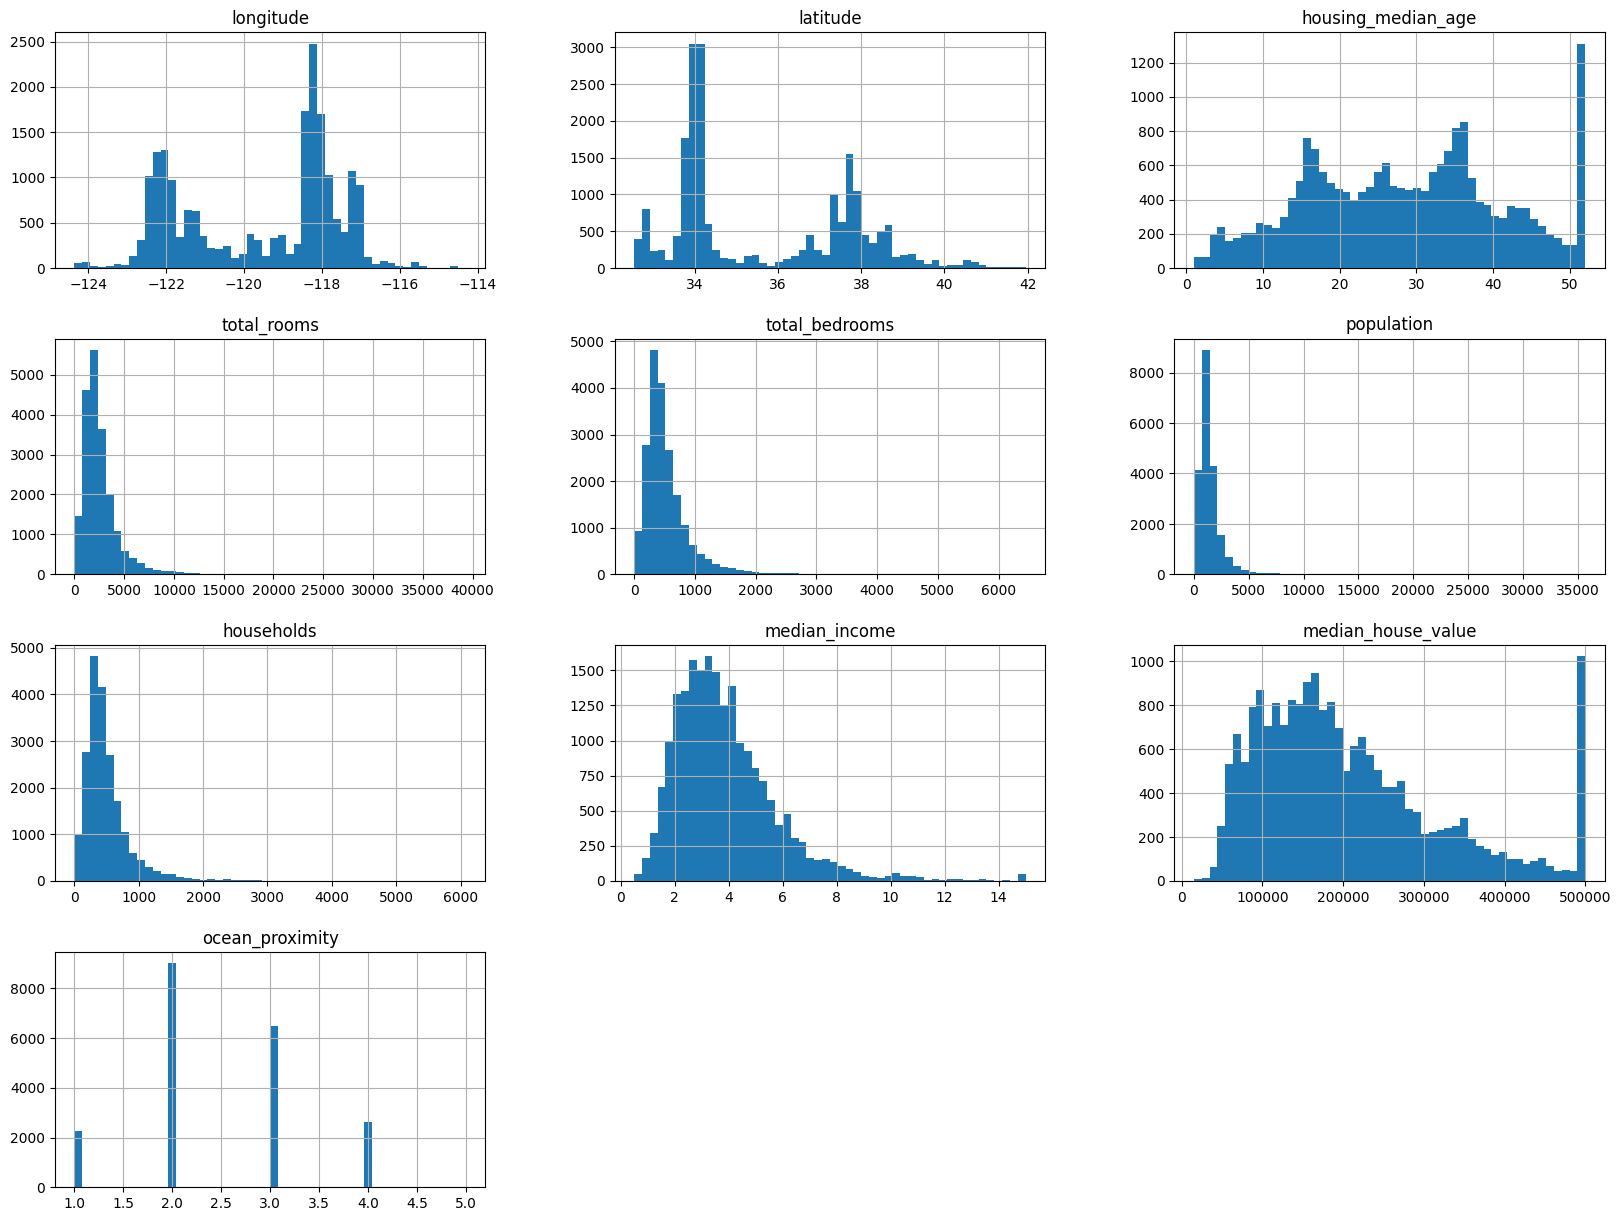

In [ ]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398,0.181198
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638,-0.067980
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432,-0.206178
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294,0.015917
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.004081
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300,-0.007061
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894,-0.015561
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355,-0.129415
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000,-0.212014
ocean_proximity,0.181198,-0.067980,-0.206178,0.015917,0.004081,-0.007061,-0.015561,-0.129415,-0.212014,1.000000


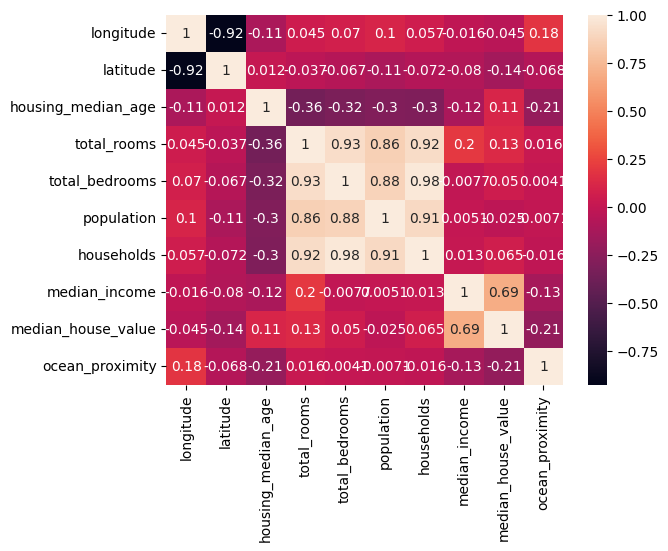

In [ ]:
ax = sns.heatmap(df.corr(), annot = True)

In [ ]:
df.columns
housing_df = df[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity',  'median_house_value']]

In [ ]:
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,1,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,1,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,1,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,1,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,1,342200.0


In [ ]:
X, y = housing_df.to_numpy()[:,:-1], housing_df.to_numpy()[:,-1]

In [ ]:
# train_pd, test_pd, val_pd = housing_df[:18000], housing_df[18000:19217], housing_df[19215:]


X_train, test_val_x , y_train, test_val_y = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(test_val_x, test_val_y, test_size=0.5, random_state=42, shuffle=False)
# len(train_pd), len(test_pd), len(val_pd)


In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape

((18389, 9), (18389,), (1022, 9), (1022,), (1022, 9), (1022,))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [ ]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8
0,0.637120,-0.781047,1.063859,-0.777520,-0.804027,-0.757840,-0.812187,-0.654866,-0.542896
1,-1.363562,0.898755,1.302120,-0.436000,-0.515117,-0.537770,-0.485637,0.219854,1.796212
2,-0.799778,2.653422,-0.524548,-0.233669,-0.250083,-0.525347,-0.488270,-0.749044,0.626658
3,-1.223863,0.622687,0.587337,-1.057281,-1.116814,-1.063097,-1.133470,-0.334650,1.796212
4,1.121075,-0.827838,-1.159911,-0.152552,-0.481689,-0.372718,-0.493537,0.645021,0.626658
...,...,...,...,...,...,...,...,...,...
18384,0.801765,-0.898024,-0.365708,0.165923,-0.087721,0.014178,-0.119585,0.815351,-0.542896
18385,1.016302,-0.879308,-1.874694,1.481767,1.189692,1.630091,1.323556,0.483153,-0.542896
18386,0.577249,-0.762330,1.063859,-0.477941,-0.400508,-0.416200,-0.359230,-0.408963,-0.542896
18387,-1.228852,0.903434,-1.318752,1.423234,1.258935,1.788044,1.471030,0.741407,-1.712449


In [ ]:
X_train.shape, X_test.shape, X_val.shape,

((18389, 9), (1022, 9), (1022, 9))

In [ ]:
##Linear Regression Model

In [ ]:
# Preprocessing - scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Train the model
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)

# rfr = RandomForestRegressor()
# rfr.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
y_train_pred = lm.predict(X_train_scaled)
y_val_pred = lm.predict(X_val_scaled)

In [ ]:
mse_train = mse(y_train, y_train_pred)
rmse_train = mse(y_train, y_train_pred, squared=False)

# Calculate MSE and RMSE for validation set
mse_val = mse(y_val, y_val_pred)
rmse_val = mse(y_val, y_val_pred, squared=False)

# Calculate R² score for training set
r2_train = r2_score(y_train, y_train_pred)

# Calculate R² score for validation set
r2_val = r2_score(y_val, y_val_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [ ]:
print(f'Training MSE: {mse_train}')
print(f'Training RMSE: {rmse_train}')
print(f'Training R²: {r2_train}')

Training MSE: 4838074398.576235
Training RMSE: 69556.26785974241
Training R²: 0.6355017652917221


In [ ]:
print(f'Validation MSE: {mse_val}')
print(f'Validation RMSE: {rmse_val}')
print(f'Validation R²: {r2_val}')

Validation MSE: 4762628330.416289
Validation RMSE: 69011.79848704343
Validation R²: 0.6501239114798445


In [ ]:
print('Some predictions on the validation set:', y_val_pred[:5])

Some predictions on the validation set: [194405.15040176 155861.41255939 203533.4153512  176977.67805104
 212830.4716826 ]


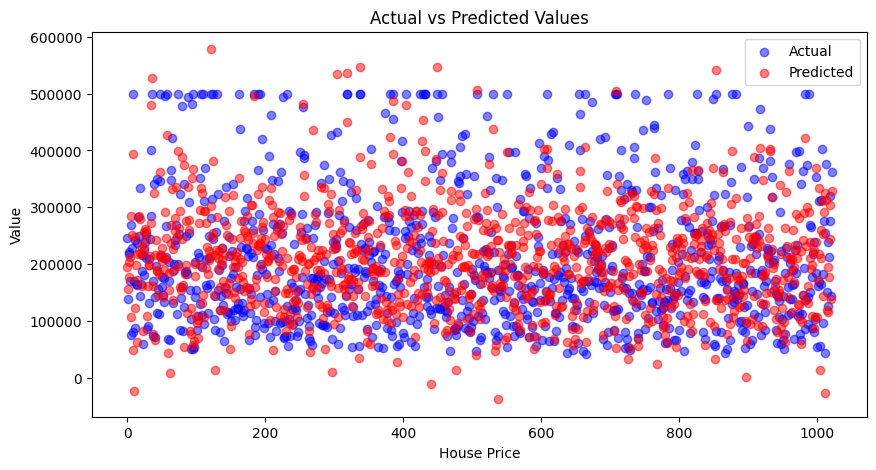

In [ ]:
plt.figure(figsize=(10, 5))

# Plot actual values
plt.scatter(range(len(y_val)), y_val, color='blue', alpha=0.5, label='Actual')

# Plot predicted values
plt.scatter(range(len(y_val)), y_val_pred, color='red', alpha=0.5, label='Predicted')

plt.xlabel('House Price')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()


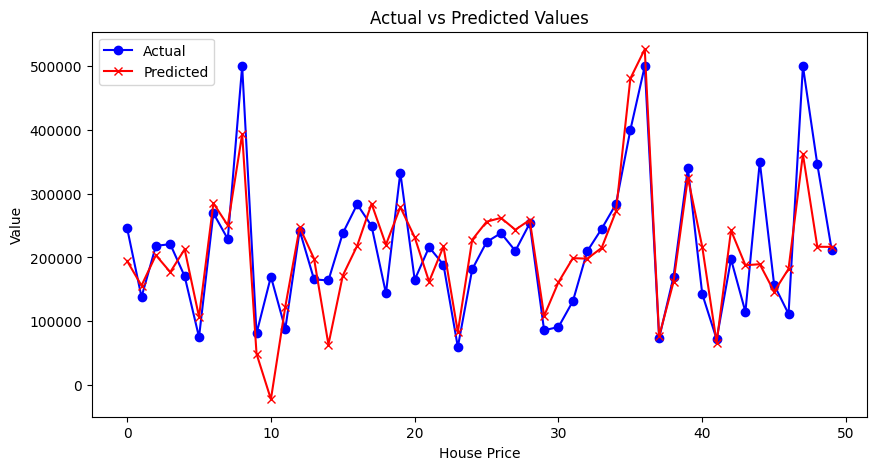

     Actual      Predicted
0  245800.0  194405.150402
1  137900.0  155861.412559
2  218200.0  203533.415351
3  220800.0  176977.678051
4  170500.0  212830.471683
5   75000.0  106844.449921
6  269400.0  284937.058173
7  228900.0  250402.249996
8  500001.0  393390.381631
9   80800.0   48918.599638


In [ ]:

plt.figure(figsize=(10, 5))

plt.plot(y_val[:50], label='Actual', marker='o', color='blue')
plt.plot(y_val_pred[:50], label='Predicted', marker='x', color='red')
plt.xlabel('House Price')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

comparison = pd.DataFrame({'Actual': y_val[:10], 'Predicted': y_val_pred[:10]})
print(comparison)